In [1]:
import psycopg2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

from pprint import pprint

try:
  con
except NameError:
  con = psycopg2.connect(user="postgres", dbname="minrttdb", password="coap")
  con.set_session(readonly=True, autocommit=False)
    

In [27]:
exp_data_sql = """
SELECT 
    ex.exp_id,
    ex.num_trials, 
    d.dnid,
    n.*
FROM 
	experiment ex
  JOIN deployed_node d ON d.exp_id = ex.exp_id
  JOIN node n ON d.node_id = n.node_id
GROUP BY
	ex.exp_id,
    n.node_id,
    d.dnid
ORDER BY
  ex.attacker_rate,
  ex.proxy_connections
;
"""
lay_of_the_land = pd.read_sql_query(exp_data_sql, con)
con.commit()
print("\n".join(lay_of_the_land.exp_id.unique().tolist()))
lay_of_the_land

2client_0attacker_infinite_requests_many_trials
5client_0attacker_infinite_requests_many_trials
4client_0attacker_infinite_requests_many_trials
1client_0attacker_infinite_requests_many_trials


,exp_id,num_trials,dnid,node_id,node_name,hardware_type,operating_system
0,2client_0attacker_infinite_requests_many_trials,5,26,3,attacker,pc2133,ubuntu1804-std
1,5client_0attacker_infinite_requests_many_trials,5,21,8,client4,pc3000,ubuntu1804-std
2,4client_0attacker_infinite_requests_many_trials,5,14,1,originserver,pc2133,ubuntu1804-std
3,1client_0attacker_infinite_requests_many_trials,5,3,6,client2,pc3060,ubuntu1804-std
4,4client_0attacker_infinite_requests_many_trials,5,8,3,attacker,pc2133,ubuntu1804-std
5,4client_0attacker_infinite_requests_many_trials,5,12,8,client4,pc3000,ubuntu1804-std
6,4client_0attacker_infinite_requests_many_trials,5,13,9,client5,pc3000,ubuntu1804-std
7,2client_0attacker_infinite_requests_many_trials,5,29,7,client3,pc2133,ubuntu1804-std
8,1client_0attacker_infinite_requests_many_trials,5,6,4,proxy,microcloud,ubuntu1804-std
9,5client_0attacker_infinite_requests_many_trials,5,24,4,proxy,microcloud,ubuntu1804-std


In [13]:
client_rtt_sql = """
SELECT
	d.exp_id,
	n.node_name,
	e.trial,
	e.message_marker,
    COUNT(e.observe_timestamp) AS num_timestamps,
	1e3 * (MAX(e.observe_timestamp) - MIN(e.observe_timestamp)) AS message_rtt_ms
FROM
	deployed_node d
	JOIN node n ON n.node_id = d.node_id
	JOIN event e ON e.observer_id = d.dnid
	JOIN experiment ex ON ex.exp_id = d.exp_id
WHERE
	n.node_name LIKE '%client%'
GROUP BY
	d.exp_id,
	n.node_name,
	e.trial,
	e.message_marker
"""

df = pd.read_sql_query(client_rtt_sql, con)
con.commit()

# Filter out bogus measurements 
df = df[df["num_timestamps"] == 2]

df

,exp_id,node_name,trial,message_marker,num_timestamps,message_rtt_ms
0,1client_0attacker_infinite_requests_many_trials,client1,1,1,2,83.851099
1,1client_0attacker_infinite_requests_many_trials,client1,1,2,2,7.204056
2,1client_0attacker_infinite_requests_many_trials,client1,1,3,2,6.121874
3,1client_0attacker_infinite_requests_many_trials,client1,1,4,2,6.227255
4,1client_0attacker_infinite_requests_many_trials,client1,1,5,2,6.152153
...,...,...,...,...,...,...
586858,4client_0attacker_infinite_requests_many_trials,client4,5,92911,2,4.204035
586859,4client_0attacker_infinite_requests_many_trials,client4,5,92912,2,4.210234
586860,4client_0attacker_infinite_requests_many_trials,client4,5,92913,2,3.965139
586861,4client_0attacker_infinite_requests_many_trials,client4,5,92914,2,4.221916


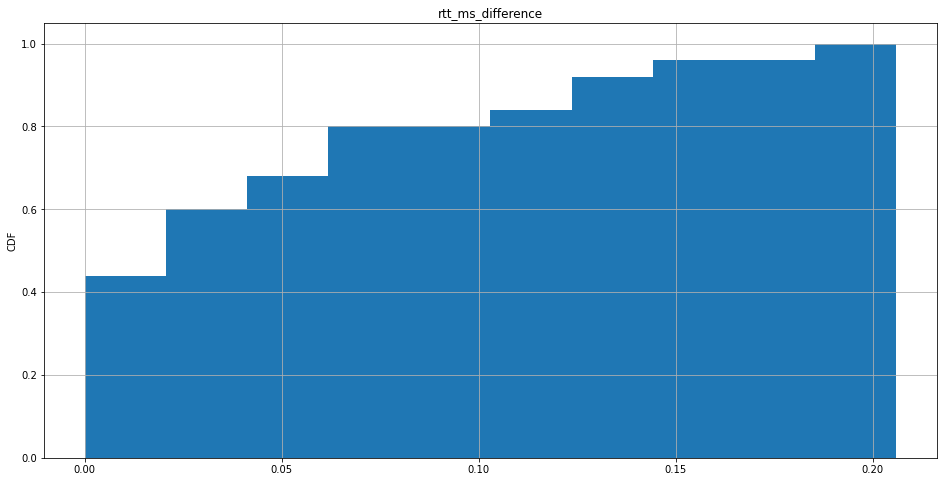

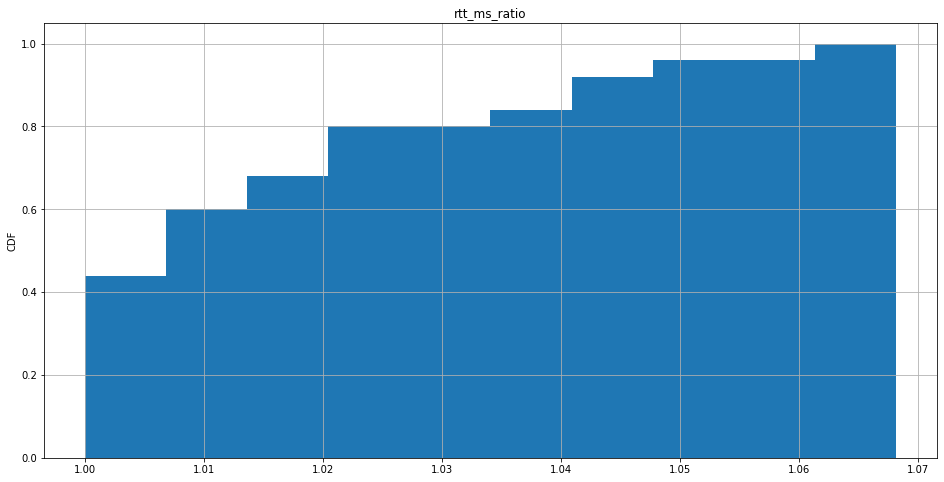

,exp_id,trial,client_min_rtt_ms,node_name,exp_min_rtt_ms,rtt_ms_difference,rtt_ms_ratio
0,1client_0attacker_infinite_requests_many_trials,1,3.269911,client1,3.269911,0.000000,1.000000
1,1client_0attacker_infinite_requests_many_trials,2,3.289223,client1,3.289223,0.000000,1.000000
2,1client_0attacker_infinite_requests_many_trials,3,3.275871,client1,3.275871,0.000000,1.000000
3,1client_0attacker_infinite_requests_many_trials,4,3.296852,client1,3.296852,0.000000,1.000000
4,1client_0attacker_infinite_requests_many_trials,5,3.283978,client1,3.283978,0.000000,1.000000
5,4client_0attacker_infinite_requests_many_trials,1,3.032923,client1,3.022909,0.010014,1.003313
6,4client_0attacker_infinite_requests_many_trials,2,3.043890,client1,3.043890,0.000000,1.000000
7,4client_0attacker_infinite_requests_many_trials,3,3.048182,client1,3.048182,0.000000,1.000000
8,4client_0attacker_infinite_requests_many_trials,4,3.048897,client1,3.021002,0.027895,1.009234
9,4client_0attacker_infinite_requests_many_trials,5,3.060818,client1,3.022909,0.037909,1.012540


In [48]:
# RTT in an experiment
exp_min_rtt_df = df.groupby(by=["exp_id", "trial"]).agg(
    exp_min_rtt_ms=('message_rtt_ms', 'min'),
)

client_rtt_df = df.groupby(by=["exp_id", "node_name", "trial"]).agg(
    client_min_rtt_ms=('message_rtt_ms', 'min'),
    node_name=('node_name', 'first')
)

rtt_comp_df = client_rtt_df.merge(exp_min_rtt_df, on=["exp_id", "trial"], how="left").reset_index()

rtt_comp_df["rtt_ms_difference"] = rtt_comp_df["client_min_rtt_ms"] - rtt_comp_df["exp_min_rtt_ms"]
rtt_comp_df["rtt_ms_ratio"] = rtt_comp_df["client_min_rtt_ms"] / rtt_comp_df["exp_min_rtt_ms"]

axs = []
axs.append(rtt_comp_df.hist(column="rtt_ms_difference", density=True, cumulative=True))
axs.append(rtt_comp_df.hist(column="rtt_ms_ratio", density=True, cumulative=True))

for _ax in axs:
    ax = _ax.flatten()[0]
    ax.set_ylabel("CDF")

plt.show()

rtt_comp_df